In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import sys

#np.set_printoptions(threshold=sys.maxsize) #just something I needed at one point to print out a whole table


In [2]:
#read in data from example_failure_data_sets and choose sheet SYS1

df = pd.read_excel("./data/example_failure_data_sets.xlsx", sheet_name="SYS1", engine="openpyxl")
df

,FN,IF,FT
0,1,3,3
1,2,30,33
2,3,113,146
3,4,81,227
4,5,115,342
...,...,...,...
131,132,648,76057
132,133,5485,81542
133,134,1160,82702
134,135,1864,84566


In [3]:
#make train and test splits. Im choosing 80/20 split so 1/5 for testing 4/5 for training
split_fraction = 1/5

(x_train, y_train), (x_test, y_test) = (df["FT"][:len(df["FT"]) - int(len(df["FT"]) * split_fraction)], df["FN"][:len(df["FT"]) - int(len(df["FT"]) *split_fraction)]), (df["FT"][len(df["FT"]) - int(len(df["FT"]) * split_fraction):], df["FN"][len(df["FT"]) - int(len(df["FT"])* split_fraction):])

#noramalizing because it makes everything actually work
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(x_train))


In [4]:
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import backend as K

#defines my custom activation function
def custom_activation(x, a=1, b=0.000034):
    return a * (1-K.exp(-b * x) )

#adds my function to keras layers (don't really need to do this, can just pass function)
get_custom_objects().update({'custom_activation': tf.keras.layers.Activation(custom_activation)})


In [5]:
#build model one layer at a time
model = keras.Sequential(normalizer)

#adding layer with 200 nodes and activation sigmoid
# model.add(tf.keras.layers.Dense(200, activation=tf.keras.activations.sigmoid))

#adding layer with 100 nodes and my custom activation function from the previous cell
model.add(tf.keras.layers.Dense(100, activation="custom_activation"))
  
#adding layer with 50 nodes and activation elu
model.add(tf.keras.layers.Dense(50, activation=tf.keras.activations.elu ))

#output layer which outputs one number so only size of one. if output is a vector of size n then it should 
# be a layer of size n
model.add(layers.Dense(1))


#compile and choose loss and optimizer functions. Optimizer takes learning rate as an argument. 
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.1))


In [6]:
#fit to the training data with 500 iterations over the data
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 53.3276
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 42.5612
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 30.3627
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 28.3670
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 31.6357
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 27.4050
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 26.9542
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 28.4139
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 27.5167
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 26.2251
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss: 26.1189
Epoch 12/500
4/4 [==============================] - 0s 1ms/step - loss: 25.7496
Epoch 13/500
4/4 [==============================]

4/4 [==============================] - 0s 1ms/step - loss: 2.2445
Epoch 207/500
4/4 [==============================] - 0s 905us/step - loss: 1.7464
Epoch 208/500
4/4 [==============================] - 0s 928us/step - loss: 1.9291
Epoch 209/500
4/4 [==============================] - 0s 976us/step - loss: 1.9254
Epoch 210/500
4/4 [==============================] - 0s 1ms/step - loss: 1.7906
Epoch 211/500
4/4 [==============================] - 0s 1ms/step - loss: 1.7551
Epoch 212/500
4/4 [==============================] - 0s 1ms/step - loss: 1.6764
Epoch 213/500
4/4 [==============================] - 0s 1ms/step - loss: 1.5515
Epoch 214/500
4/4 [==============================] - 0s 1ms/step - loss: 1.4783
Epoch 215/500
4/4 [==============================] - 0s 1ms/step - loss: 1.5990
Epoch 216/500
4/4 [==============================] - 0s 936us/step - loss: 1.5496
Epoch 217/500
4/4 [==============================] - 0s 953us/step - loss: 1.8405
Epoch 218/500
4/4 [=========================

4/4 [==============================] - 0s 1ms/step - loss: 1.8722
Epoch 309/500
4/4 [==============================] - 0s 1ms/step - loss: 1.6296
Epoch 310/500
4/4 [==============================] - 0s 1ms/step - loss: 1.6721
Epoch 311/500
4/4 [==============================] - 0s 1ms/step - loss: 1.8568
Epoch 312/500
4/4 [==============================] - 0s 1ms/step - loss: 2.0912
Epoch 313/500
4/4 [==============================] - 0s 1ms/step - loss: 1.9878
Epoch 314/500
4/4 [==============================] - 0s 1ms/step - loss: 1.7436
Epoch 315/500
4/4 [==============================] - 0s 1ms/step - loss: 1.5516
Epoch 316/500
4/4 [==============================] - 0s 1ms/step - loss: 1.9408
Epoch 317/500
4/4 [==============================] - 0s 1ms/step - loss: 1.6542
Epoch 318/500
4/4 [==============================] - 0s 1000us/step - loss: 1.9849
Epoch 319/500
4/4 [==============================] - 0s 933us/step - loss: 1.8631
Epoch 320/500
4/4 [==============================

In [7]:
#predict on the testing data using the model we just trained 
y = np.array(model.predict(x_test)) #y is what the model predicts


In [8]:
#predictive mean squared error. one of the more relavant statistics. Doesn't tell the whole story as size
#magnitude grows so the later points are going to have a higher penalty. Still error is high
pmse =0;
for a, b in zip(y, list(y_test)):
    pmse += (a[0]-b)**2
#     print("{}, {}, {}".format( a, b,(a[0]-b)**2))
    
print(pmse/len(y_test))
# print(len(y_test))

59.403138510065794


In [9]:
#mean squared error. Same as the above but gets the error over training + testing
y = np.array(model.predict(np.append(x_train, x_test)))

mse = 0
for a, b in zip(y, np.append(list(y_train),list(y_test))):
    mse += (a-b)**2
#     print("{}".format( a[0] ))
print(mse/len(np.append(y_train,y_test)))


[15.350577]


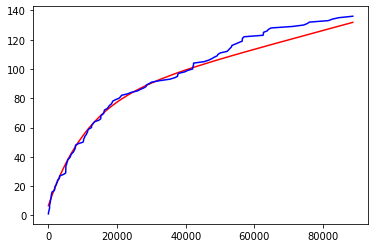

In [10]:
# 3.5647635
#1.3560996

import matplotlib.pyplot as plt

plt.plot(np.append(x_train,x_test),  y, "r", np.append(x_train,x_test), np.append(y_train,y_test), "b")
plt.show()

In [11]:
# plt.savefig("80_20_split.png")